In [1]:
!git clone https://github.com/1stDayHack/FDK.git

Cloning into 'FDK'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 1903 (delta 3), reused 8 (delta 0), pack-reused 1892
Receiving objects: 100% (1903/1903), 487.12 MiB | 47.12 MiB/s, done.
Resolving deltas: 100% (199/199), done.
Checking out files: 100% (1601/1601), done.


In [2]:
!cp -r FDK/* ./
!rm -rf FDK/

In [3]:
!pip install -r requirements.txt

In [4]:
import torch
torch.__version__

'1.7.0+cu101'

In [5]:
!nvidia-smi

Sun Dec  6 02:07:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
!python -m pip install detectron2 -f \
  https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


In [7]:
from src.core.detect import Detector
from src.core.utils import utils
from PIL import Image
import os

In [8]:
det = Detector(name="DemoDet")

In [9]:
img = Image.open("misc/nyc_superres/out0166.jpg.jpg")

In [10]:
img_cv = utils.pil_to_cv2(img)

/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


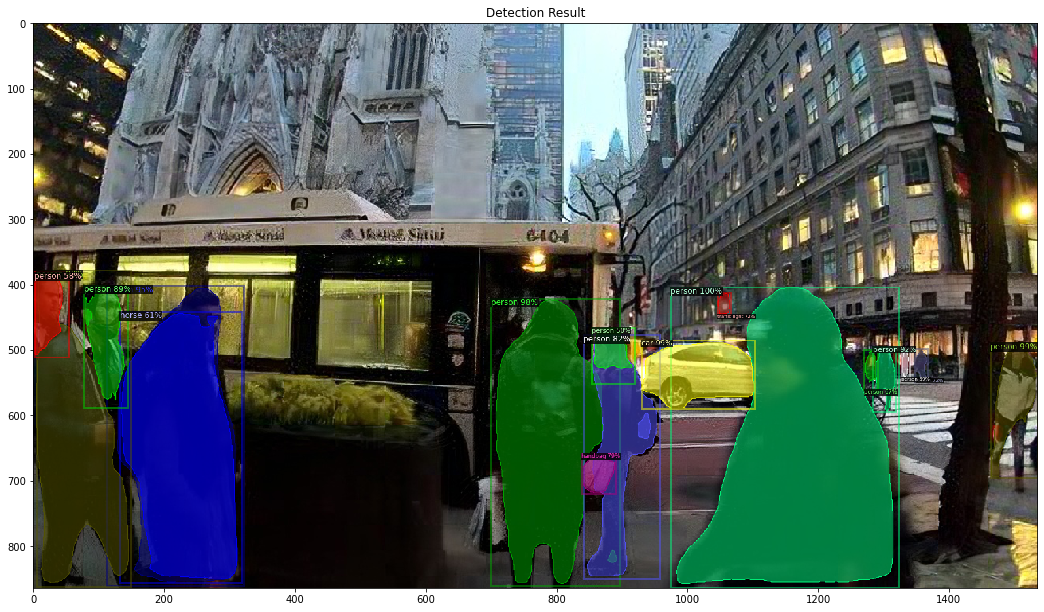

In [11]:
output = det.predict(img_cv)
out_img = det.visualize(img_cv,output,figsize=(18,18))
